## Serial Crystallography Introduction

<img src="ijms-20-01094-g001.png" width="700" align="left"/>  

(c) Nam et al.  Int. J. Mol. Sci. 2019, 20(5), 1094; https://doi.org/10.3390/ijms20051094  

## Sample choice

[3WUL](https://www.rcsb.org/structure/3WUL) is a protein structure in PDB (Sugahara et al, 2016, [10.1038/nmeth.3172](https://dx.doi.org/10.1038/nmeth.3172)).
The protein is hen's egg-white lysozyme (HEWL), a small enzyme commonly used as a test case for X-ray crystallography.

<img src="3wul.pdb1-500.jpg" width="300" align="left"/>

## Simulation Demonstration

In [1]:
import h5py
import matplotlib.pyplot as plt
import numpy as np

from SimEx import *

initializing ocelot...



## Data path setup

In [2]:
data_path = './diffr_monolithic'

## Plot original diffraction pattern

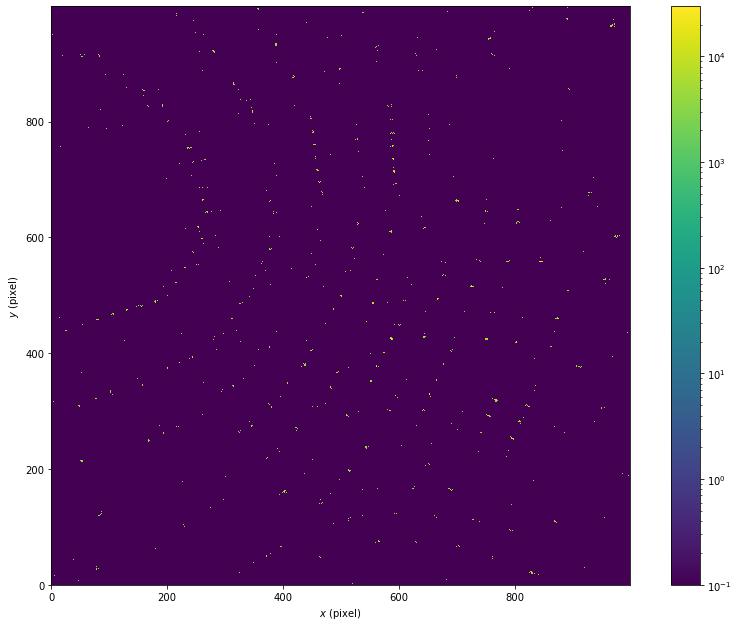

In [3]:
analyzer = DiffractionAnalysis(
    input_path=data_path,
    pattern_indices=1,
    poissonize=True
)
analyzer.plotPattern(logscale=True)
plt.gcf().set_size_inches(12, 10)

## Add random noise

We'll pick a small number of random pixels in each frame and set them to a large positive value,
to see how a faulty detector could affect the results.

In [4]:
rand_size = 5

with h5py.File(data_path+'.h5', 'r') as f:
    with h5py.File('noise.h5', 'w') as of:
        f.copy('params', of)
        for i in f['data']:
            frame = f['data'][i]['data'][...]

            # Choose pixels
            Ny, Nx = frame.shape
            ran_y = np.random.randint(Nx, size=rand_size)
            ran_x = np.random.randint(Ny, size=rand_size)

            # Set these to large values
            for y, x in zip(ran_y, ran_x):
                frame[y, x] = np.random.randint(low=-1, high=2) * 1e12

            # Save the frame
            grp = of.create_group("data/"+i)
            grp.create_dataset("data", data=frame)

Highlight the randomly altered pixels with red spots.

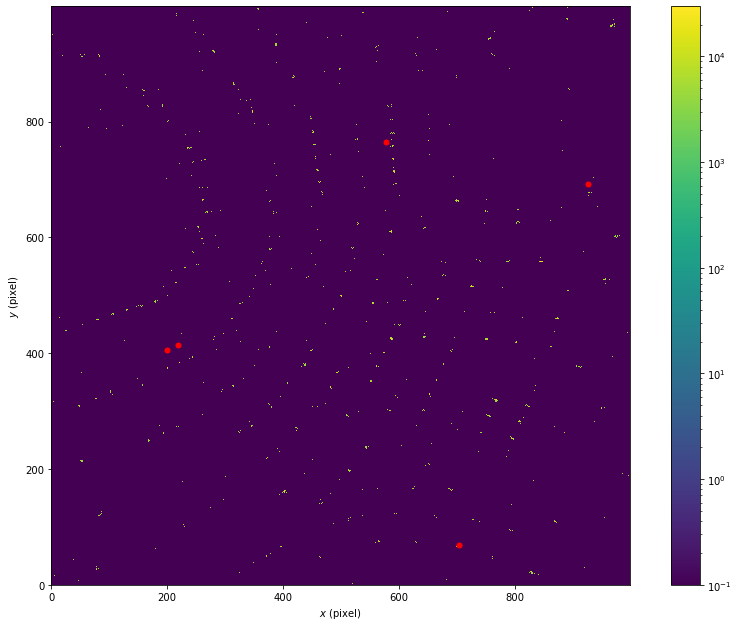

In [5]:
analyzer = DiffractionAnalysis(
    input_path=data_path, pattern_indices=1, poissonize=True
)
analyzer.plotPattern(logscale=True)
fig = plt.gcf()
fig.set_size_inches(12, 10)
fig.axes[0].plot(ran_x, ran_y, 'ro', markersize=5)